In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 60003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=102>
   FREQ      ERR    LGINT    DR     ELO     GUP   TAG   QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2         1 / cm                                      
 float64   float64 float64 int64  float64  int64 int64  int64   str8     str8  
---------- ------- ------- ----- --------- ----- ------ ----- -------- --------
  85553.38    0.01 -5.6661     3  150.0789    30 -60003  1404  7 5 3 4  6 5 2 4
85607.8022  0.0041 -7.6372     3  328.6478   122  60003  1404 30 426 3 29 623 3
 85614.502    0.03 -7.2148     3   12.8015    30 -60003  1404  7 3 5 1  6 3 3 2
85626.1755  0.0014 -7.8338     3   90.0826    74  60003  1404 18 712 0 19 515 0
 85638.329    0.01 -6.3762     3    3.0795    18 -60003  1404  4 2 3 1  3 1 2 2
 85655.803    0.01 -6.3757     3    3.0664    18 -60003  1404  4 2 3 0  3 1 2 0
 85664.032    0.01 -6.4839     3  151.4992    42 -60003  1404 10 2 9 3 10 110 3
 85727.735    0.01 -6.1644     3  162.0781    46 -60003  1404 11 4 7 3 11 3 8 3
 85743.976    0.01 -

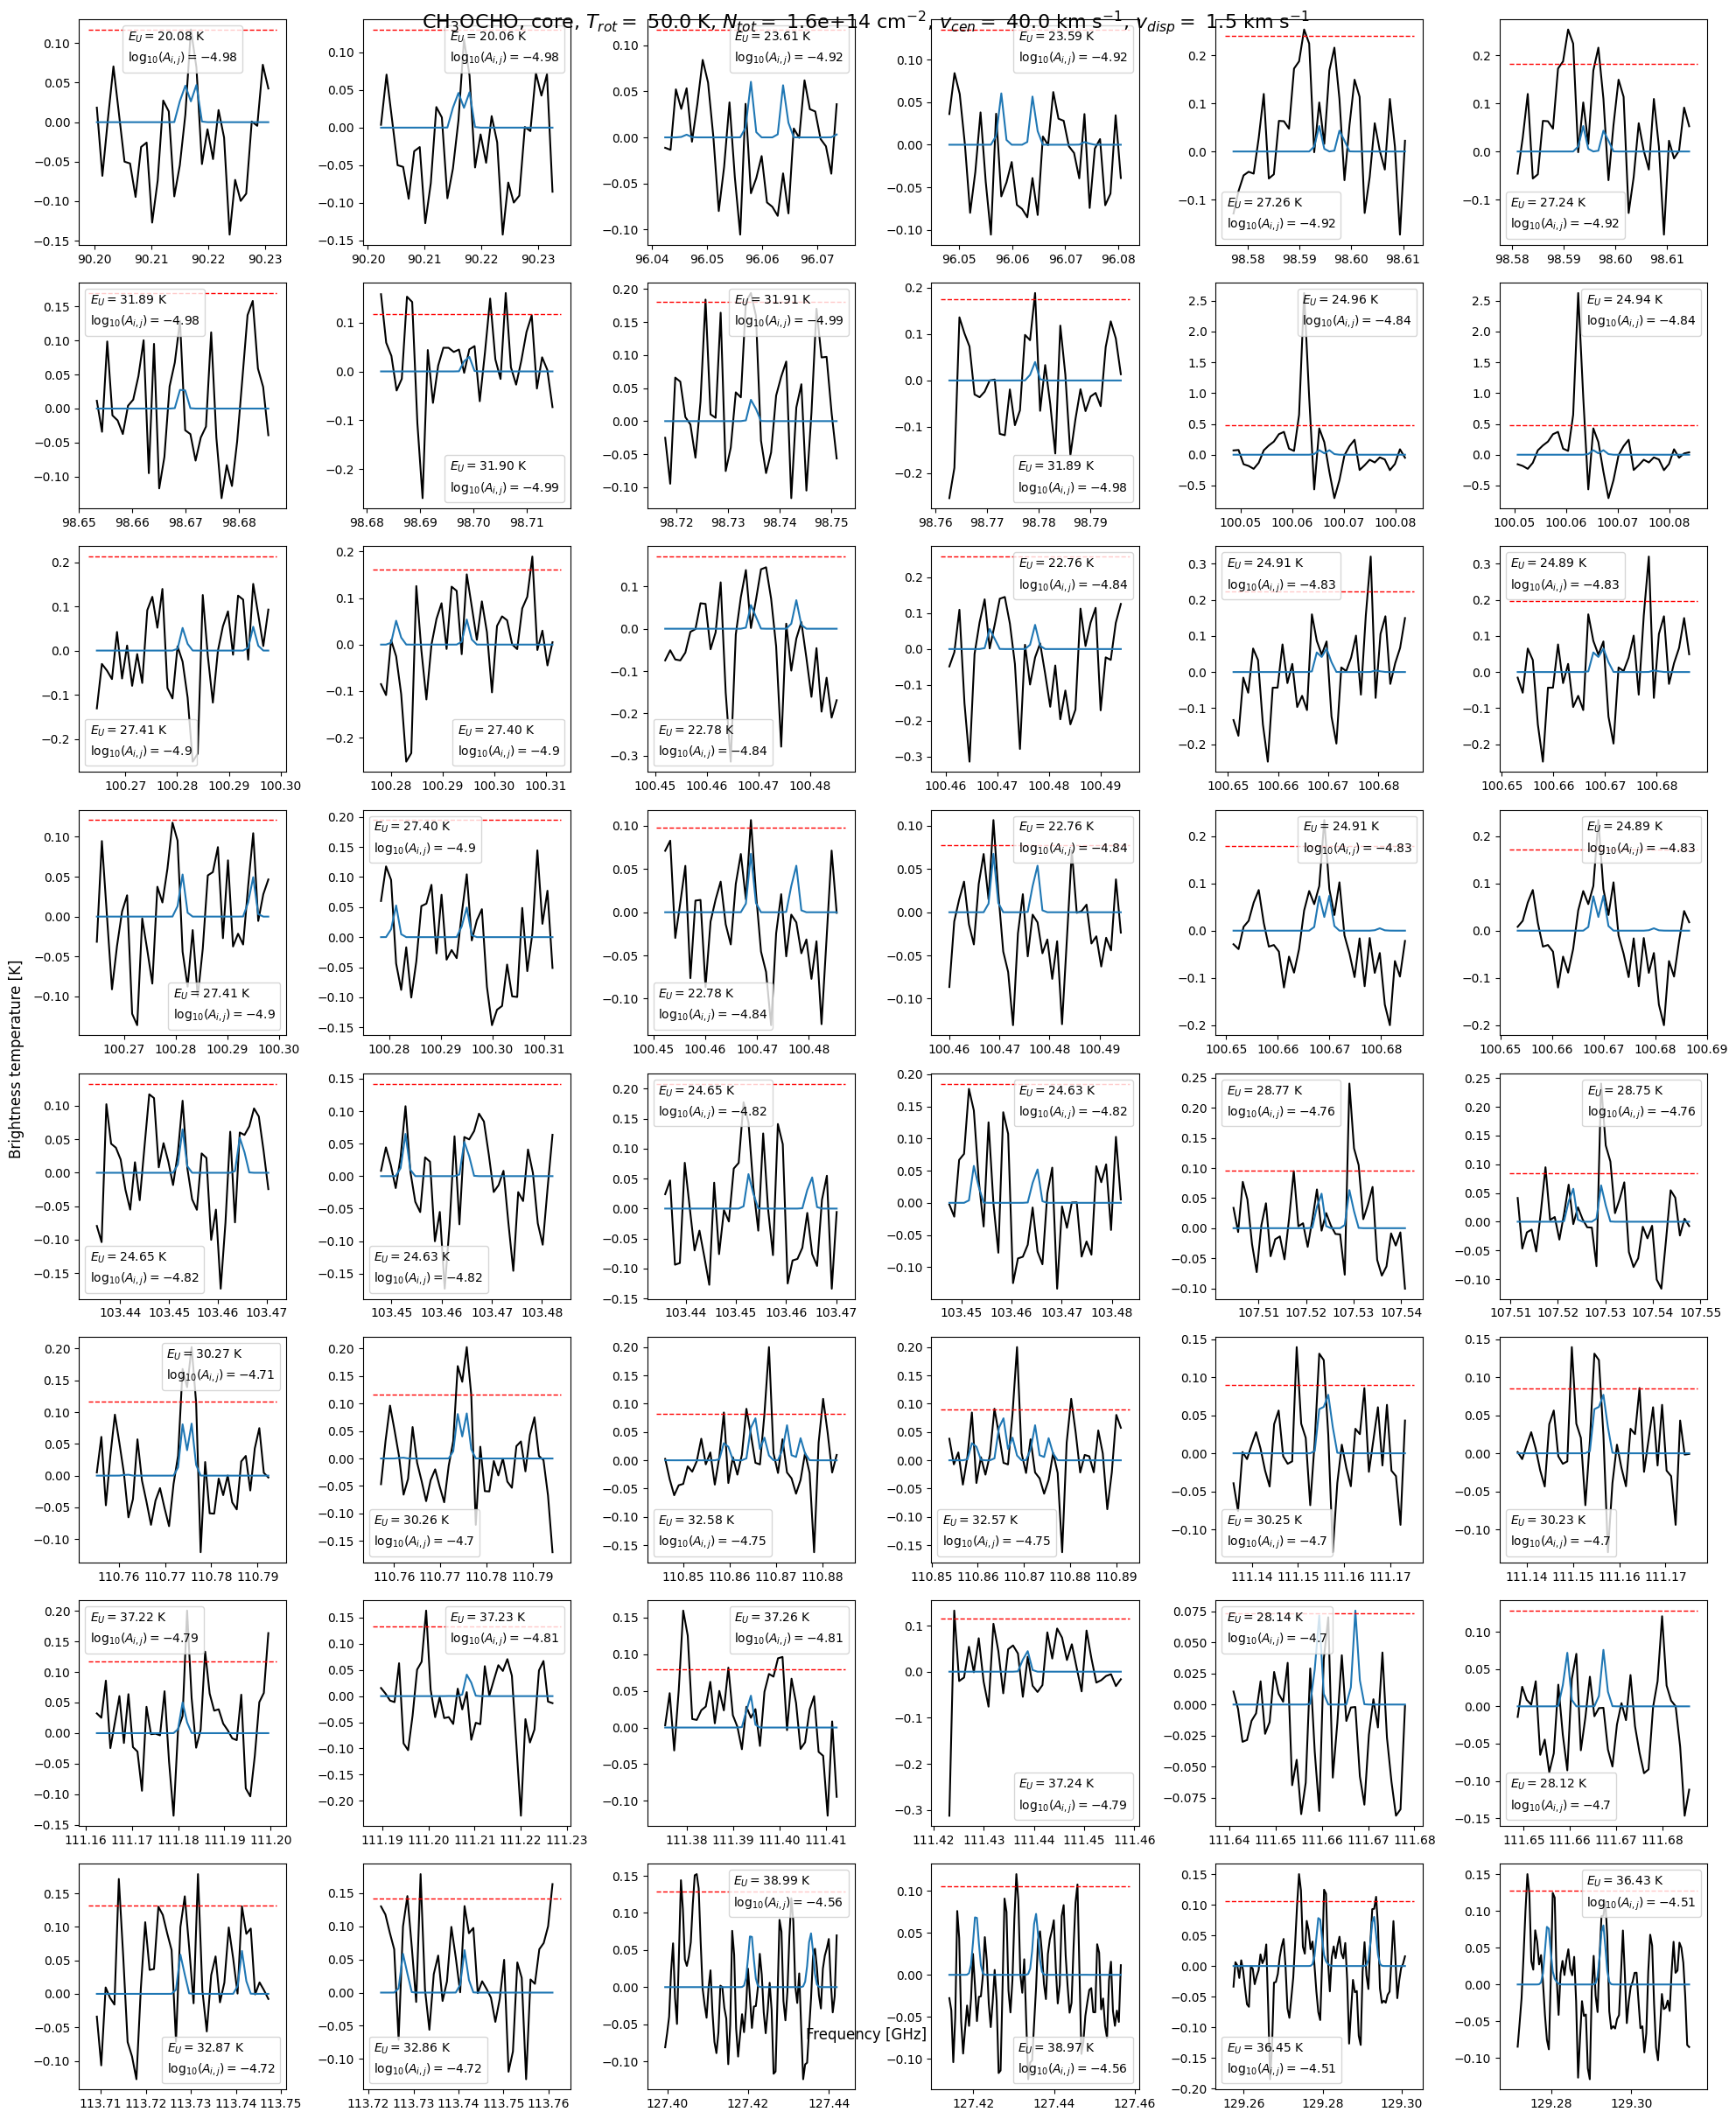

In [10]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 1.6e+14, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=25, 
               nrows=8, ncols=6, parse_loc=False, line_by_line=True, name_for_plot=f'CH$_3$OCHO', 
               extr_type="coord", crd=crd, EU_cutoff_K=40, show_2_sigma=True)

In [7]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

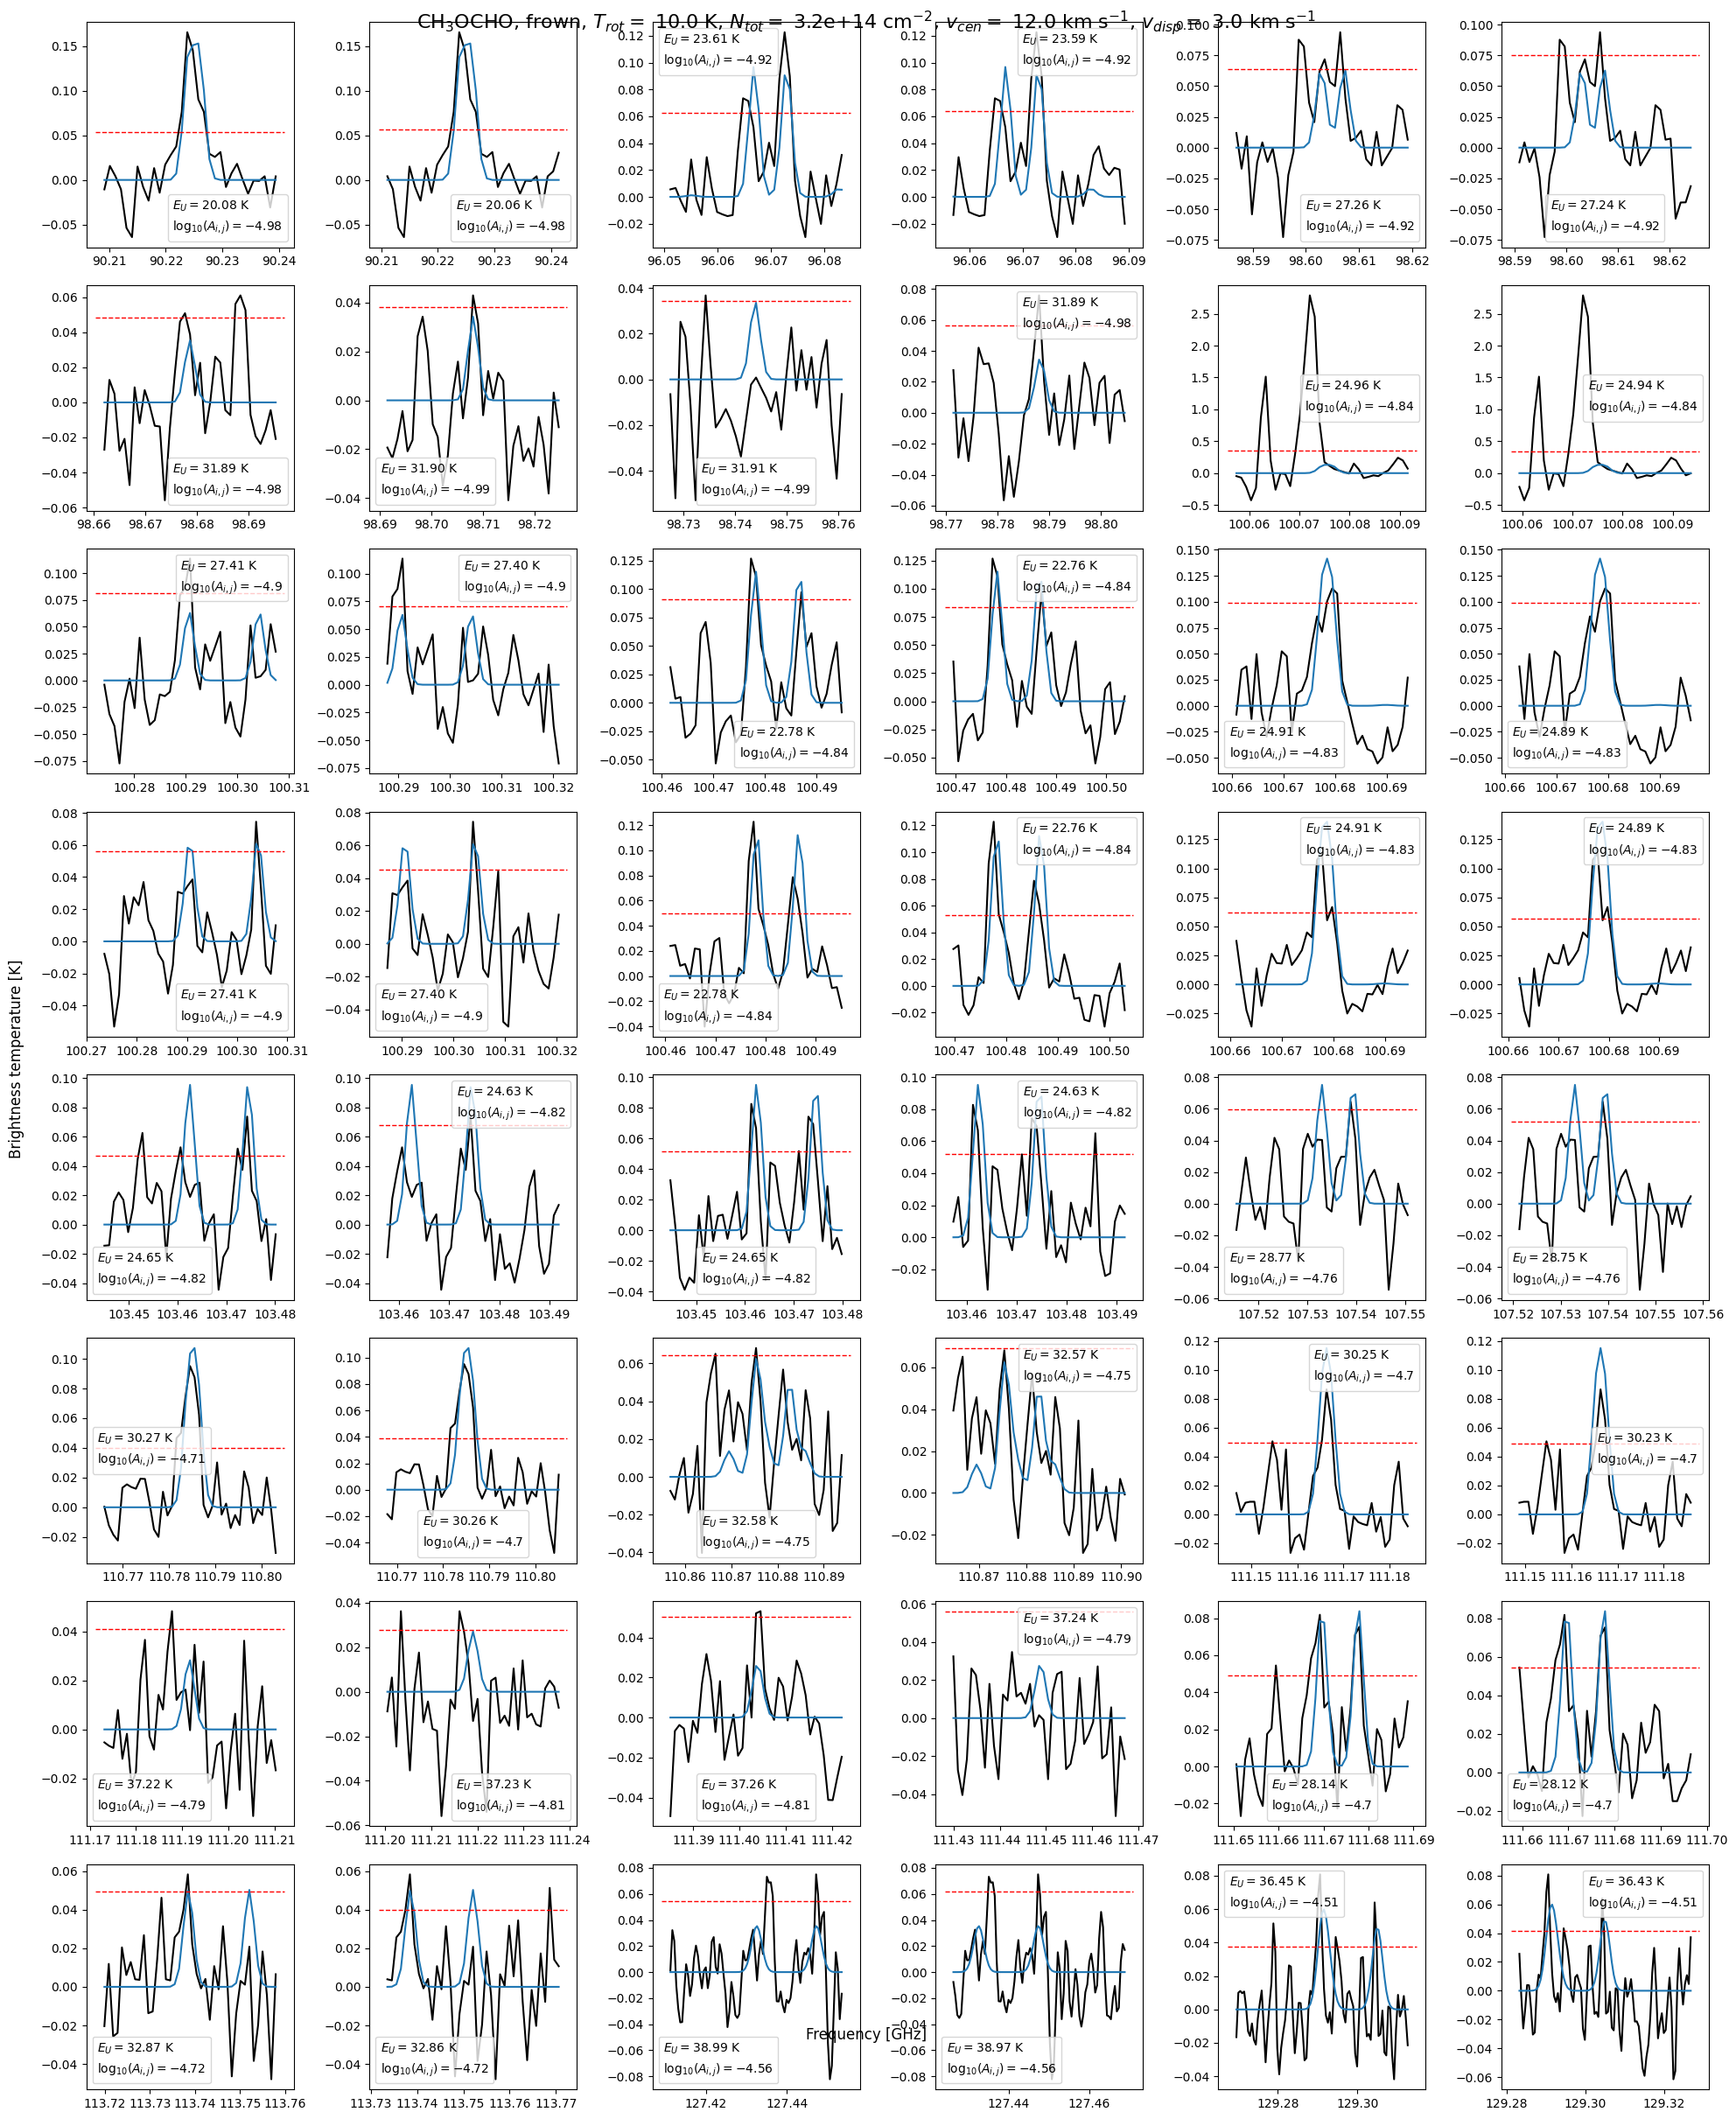

In [11]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 3.2e+14, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=25, 
                       nrows=8, ncols=6, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$OCHO', 
                       extr_type="reg", EU_cutoff_K=40, show_2_sigma=True, return_freqs=True)

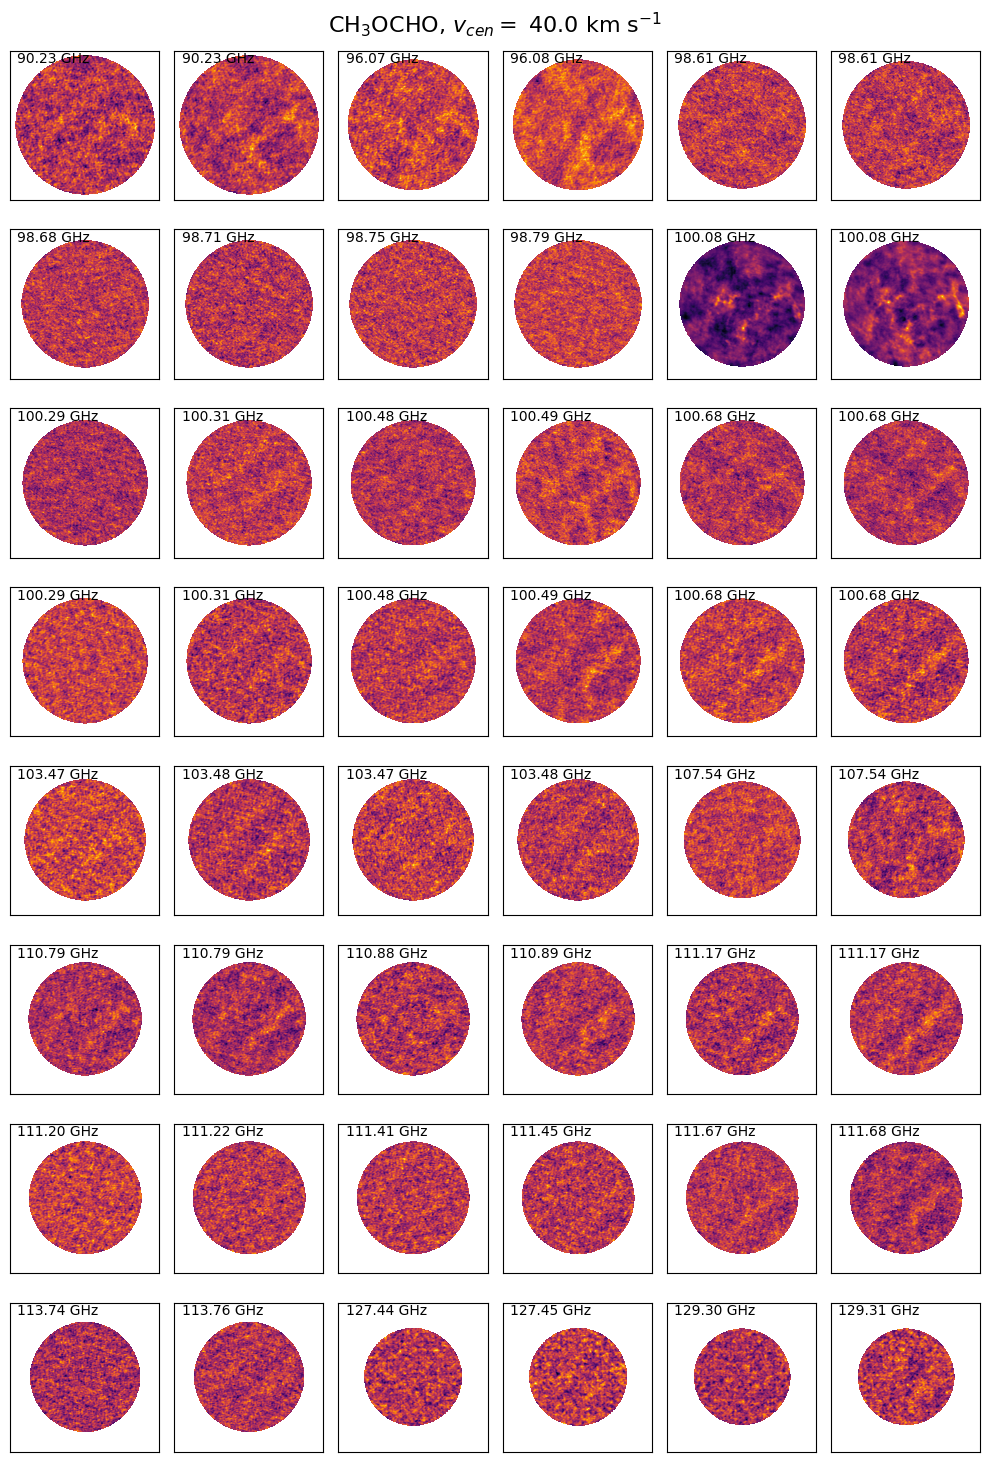

In [14]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=15, nrows=8, ncols=6, name_for_plot=f'CH$_3$OCHO')

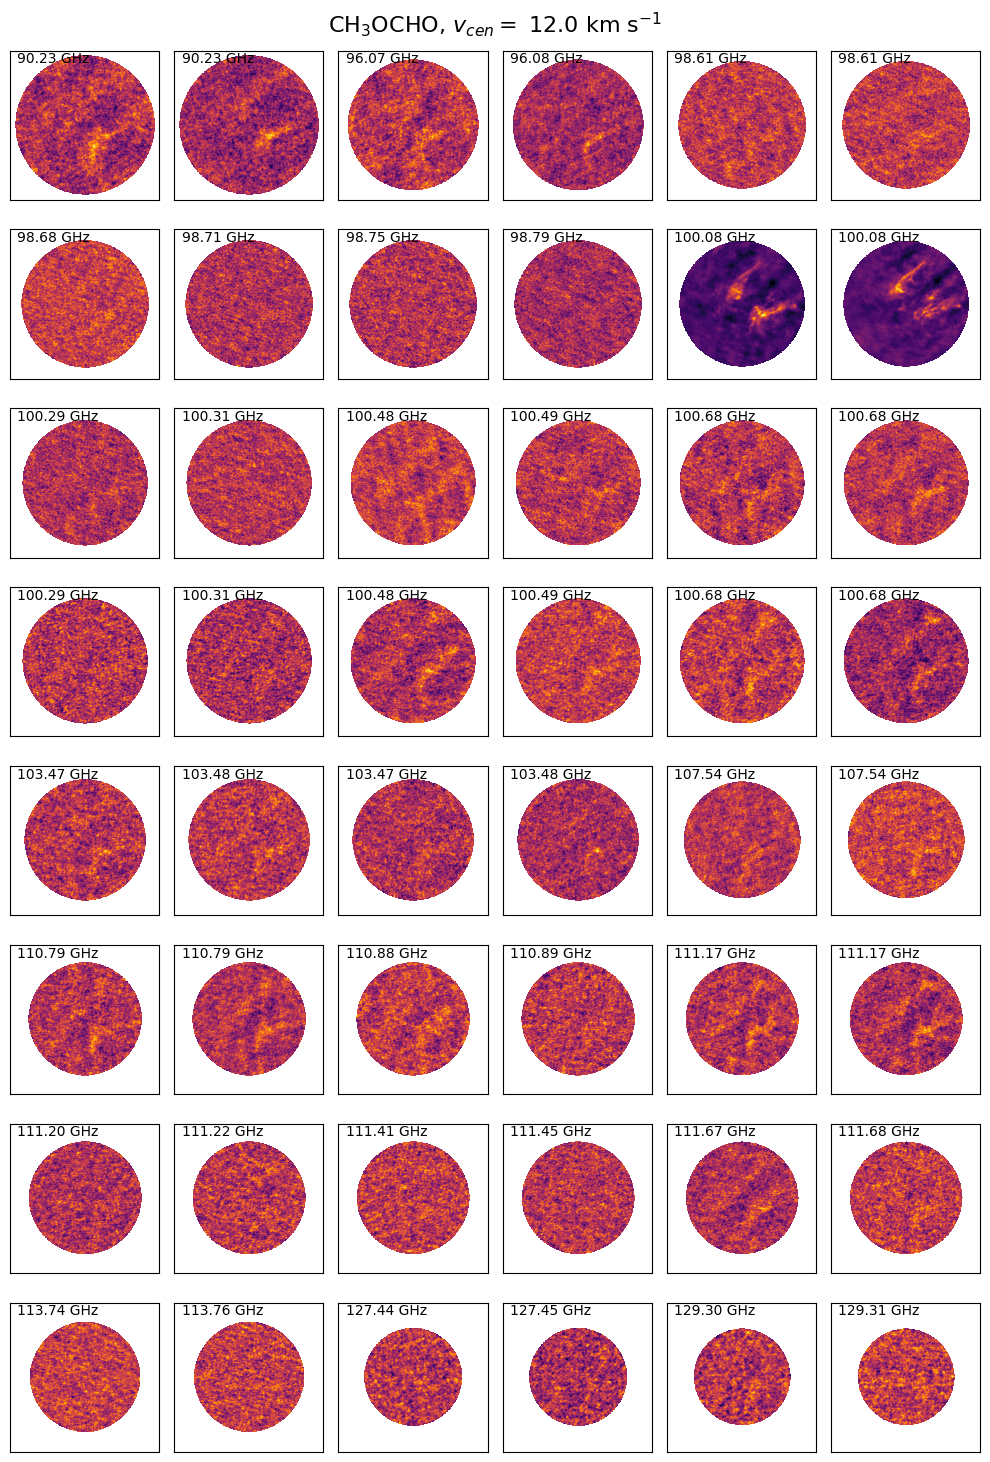

In [15]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=12.*u.km/u.s, fig_width=10, fig_height=15, nrows=8, ncols=6, name_for_plot=f'CH$_3$OCHO')